In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [3]:
# subir angulos y distancia paara regresion de S1, S2 y S3
df = pd.read_excel('angulos y distancias para regresion 10 casos brazo azul.xlsx')
df1 = pd.read_excel('angulo S0 para regresion brazo azul.xlsx')
print(df.head())
print(df.shape)
print(df1.head())
print(df1.shape)

   distancia  S1  S2  S3
0         10  80  97  72
1         12  75  92  67
2         14  65  85  64
3         16  55  75  60
4         18  47  67  58
(11, 4)
   angulo     S0
0      23   0.01
1      27   5.00
2      30  10.00
3      35  15.00
4      40  20.00
(35, 2)


In [4]:
# crear variables para estimar GPR
y1 = df.S1
y1 = y1.as_matrix()

y2 = df.S2
y2 = y2.as_matrix()

y3 = df.S3
y3 = y3.as_matrix()

y0 = df1.S0
y0 = y0.as_matrix()

# Create separate object for input features
X = df.distancia
X = X.as_matrix()
X = X.reshape(-1, 1)

# crear X paraS0
X0 = df1.angulo
X0 = X0.as_matrix()
X0 = X0.reshape(-1, 1)

In [5]:
# Define a noise parameter
dy1 = 0.5 + 1.0 * np.random.random(y1.shape)
dy2 = 0.5 + 1.0 * np.random.random(y2.shape)
dy3 = 0.5 + 1.0 * np.random.random(y3.shape)
dy0 = 0.5 + 1.0 * np.random.random(y0.shape)

# Define a kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Instanciate the models
gp1 = GaussianProcessRegressor(kernel=kernel, alpha=(dy1 / y1),
                               n_restarts_optimizer=10)
gp2 = GaussianProcessRegressor(kernel=kernel, alpha=(dy2 / y2),
                               n_restarts_optimizer=10)
gp3 = GaussianProcessRegressor(kernel=kernel, alpha=(dy3 / y3),
                               n_restarts_optimizer=10)
gp0 = GaussianProcessRegressor(kernel=kernel, alpha=(dy0 / y0),
                               n_restarts_optimizer=10)

# Fit models to data
gp1.fit(X, y1)
gp2.fit(X, y2)
gp3.fit(X, y3)
gp0.fit(X0, y0)

# Make predictions 
y_pred1, sigma = gp1.predict(X, return_std=True)
y_pred2, sigma = gp2.predict(X, return_std=True)
y_pred3, sigma = gp3.predict(X, return_std=True)
y_pred0, sigma = gp0.predict(X0, return_std=True)


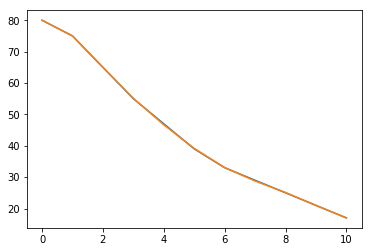

In [6]:
import matplotlib.pyplot as plt
plt.plot(y1)
plt.plot(y_pred1)
plt.show()

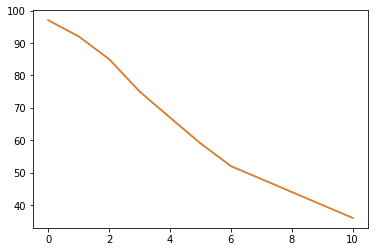

In [7]:
plt.plot(y2)
plt.plot(y_pred2)
plt.show()

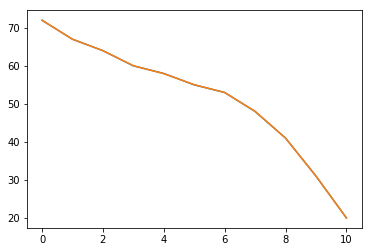

In [8]:
plt.plot(y3)
plt.plot(y_pred3)
plt.show()

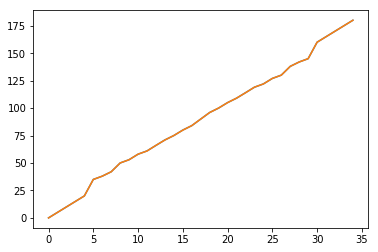

In [9]:
plt.plot(y0)
plt.plot(y_pred0)
plt.show()

In [11]:
# Enter coordinates of the point and center of the arm on the plane
coordx = 12
coordy = 27
center = 20

para_dist = ((coordx-center)*(coordx-center)) + coordy*coordy
distance = math.sqrt(para_dist)
cos_angle = (coordx-center)/distance
angle = math.degrees(math.acos(cos_angle))

y_pred_punto1, sigma = gp1.predict(distance, return_std=True)
y_pred_punto2, sigma = gp2.predict(distance, return_std=True)
y_pred_punto3, sigma = gp3.predict(distance, return_std=True)
y_pred_angulo, sigma = gp0.predict(angle, return_std=True)

print('Angle on the plane = ',angle)
print('Distance = ',distance)
print('Predicted angles of servos S0 to S3 :')
print('S0 = ',y_pred_angulo.round(0))
print('S1 = ',y_pred_punto1.round(0))
print('S2 = ',y_pred_punto2.round(0))
print('S3 = ',y_pred_punto3.round(0))

Angle on the plane =  106.50436138175502
Distance =  28.160255680657446
Predicted angles of servos S0 to S3 :
S0 =  [ 115.]
S1 =  [ 21.]
S2 =  [ 40.]
S3 =  [ 30.]
